In [1]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt

--2023-11-18 00:23:14--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 18.172.134.4, 18.172.134.124, 18.172.134.24, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/6b/20/6b201da5f0f5c60524535ebb7deac2eef68605655d3bbacfee9cce0087f3b3f5/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expires=1700526195&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMDUyNjE5NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy82Yi8yMC82YjIwMWRhNWYwZjVjNjA1MjQ1MzVlYmI3ZGVhYzJlZWY2ODYwNTY1NWQzYmJhY2ZlZTljY2UwMDg3ZjNiM2Y1L2NjNmNiMjcxMDM0MTczMjVmZjk0ZjUyYjdhNWQyZGRlNDVhNzUxNWIyN

In [2]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 62.7 MB/s eta 0:00:00


In [3]:
!nvidia-smi

Sat Nov 18 00:23:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!git clone https://github.com/abdwalid04/Stable-Diffusion.git
%cd /content/Stable-Diffusion/sd

Cloning into 'Stable-Diffusion'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 4), reused 26 (delta 4), pack-reused 0
Receiving objects: 100% (26/26), 533.15 KiB | 4.30 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Stable-Diffusion/sd


In [5]:
!ls

attention.py  ddpm.py	  diffusion.py	model_converter.py  pipeline.py
clip.py       decoder.py  encoder.py	model_loader.py


In [6]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

In [7]:
DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda:0"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

Using device: cuda:0


In [8]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "/content/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [19]:
## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

In [20]:
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "/content/download.png"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

In [21]:
## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

In [22]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

100%|██████████| 50/50 [00:26<00:00,  1.92it/s]


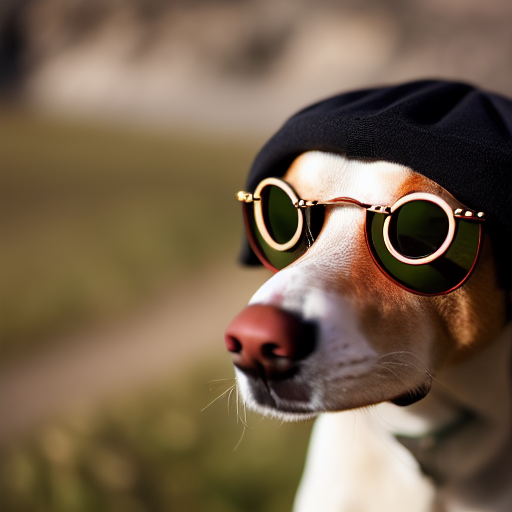

In [23]:
# Combine the input image and the output image into a single image.
Image.fromarray(output_image)